In [116]:
import pickle
from tslearn.generators import random_walks
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn_som.som import SOM
import numpy as np
from tslearn.clustering import silhouette_score

# Andiamo a caricare le serie temporali degli indici vigitali

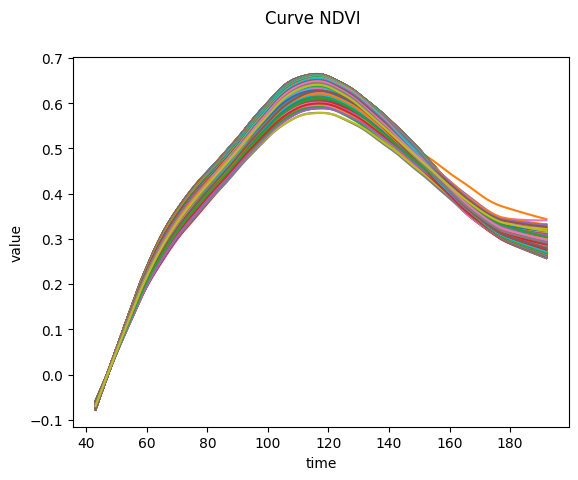

In [117]:
with open('./pickles/ndvi.pickle', 'rb') as handle:
    NDVI = pickle.load(handle)
NDVI.plot()
print() #fix duplicate plot

# Esempio di clustering

In [118]:
X = random_walks(n_ts=5000, sz=32, d=1)

print(NDVI.data_matrix.shape)

(1579, 150, 1)


C:\Users\pc\AppData\Local\Temp\ipykernel_18688\3486172220.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  axs[0].plot(xx.ravel(), "k-", alpha=.2,color="green")
C:\Users\pc\AppData\Local\Temp\ipykernel_18688\3486172220.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  axs[1].plot(xx.ravel(), "k-", alpha=.2,color="salmon")
C:\Users\pc\AppData\Local\Temp\ipykernel_18688\3486172220.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  axs[2].plot(xx.ravel(), "k-", alpha=.2,color="red")


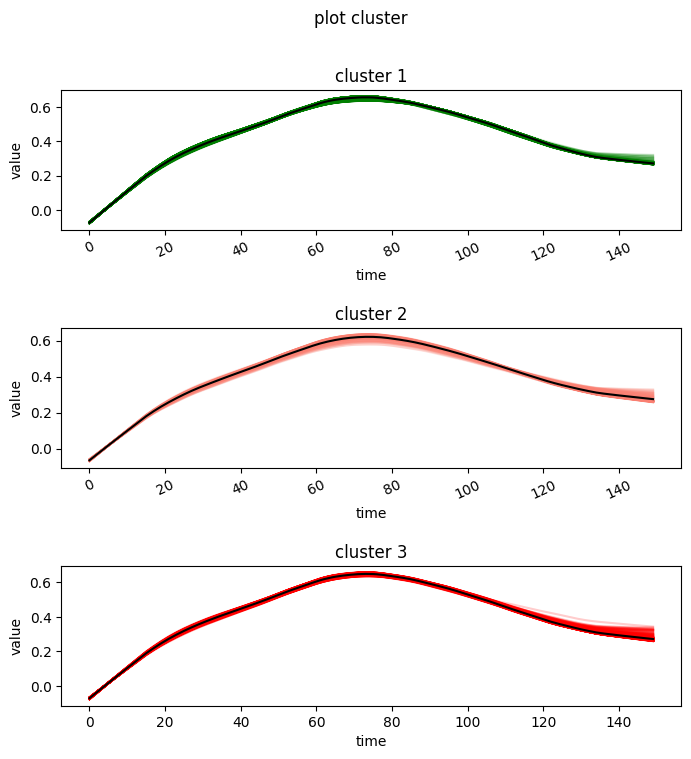

In [119]:
km = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=50,
                      random_state=0)
y_pred = km.fit_predict(NDVI.data_matrix)

#img = plt.figure()

'''for yi in range(3):
    plt.subplot(3, 3, 4 + yi)
    for xx in NDVI.data_matrix[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, NDVI.data_matrix.shape[1])
    plt.ylim(0, 0.7)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")'''

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 8))
plt.subplots_adjust(hspace=0.7)
fig.suptitle('plot cluster')
plt.sca(axs[0])
plt.xticks(rotation=25) # Rotate label

for xx in NDVI.data_matrix[y_pred == 0]:
        axs[0].plot(xx.ravel(), "k-", alpha=.2,color="green")

axs[0].plot(range(0,150),km.cluster_centers_[0].ravel(),color="black")
axs[0].set_title("cluster 1")
axs[0].set_xlabel("time")
axs[0].set_ylabel("value")

for xx in NDVI.data_matrix[y_pred == 1]:
        axs[1].plot(xx.ravel(), "k-", alpha=.2,color="salmon")

axs[1].plot(range(0,150),km.cluster_centers_[1],color="black")
axs[1].set_title("cluster 2")
axs[1].set_xlabel("time")
axs[1].set_ylabel("value")

for xx in NDVI.data_matrix[y_pred == 2]:
        axs[2].plot(xx.ravel(), "k-", alpha=.2,color="red")

axs[2].plot(range(0,150),km.cluster_centers_[2],color="black")
axs[2].set_title("cluster 3")
axs[2].set_xlabel("time")
axs[2].set_ylabel("value")
plt.sca(axs[1])
plt.xticks(rotation=25)
plt.show()

# Stampa dell'insieme dei cluster

C:\Users\pc\AppData\Local\Temp\ipykernel_18688\2201573758.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  axs.plot(xx.ravel(), "k-", alpha=0.01,color="green")
C:\Users\pc\AppData\Local\Temp\ipykernel_18688\2201573758.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  axs.plot(xx.ravel(), "k-", alpha=transparent,color="red")
C:\Users\pc\AppData\Local\Temp\ipykernel_18688\2201573758.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  axs.plot(xx.ravel(), "k-", alpha=transparent,color="#FFFFE0")


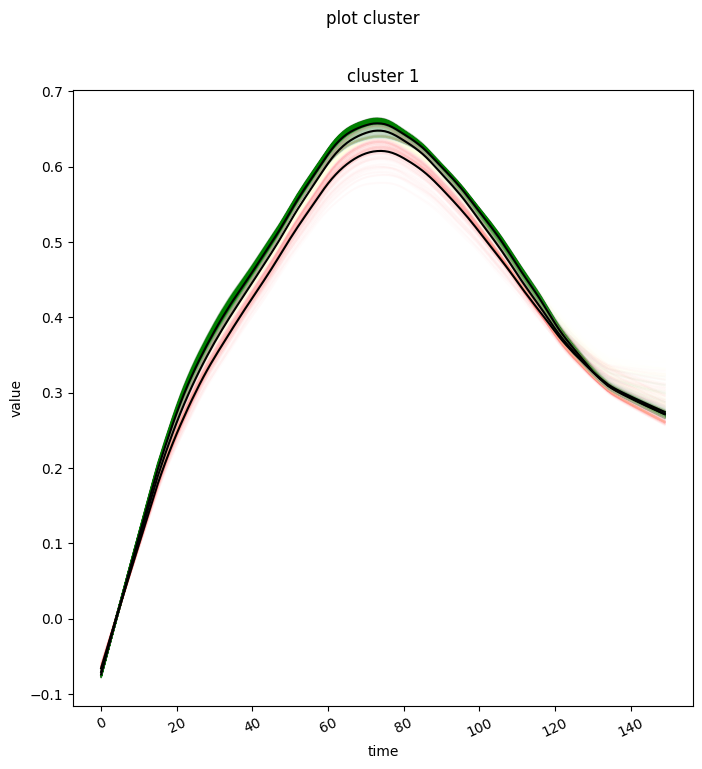

In [120]:
transparent = 0.01

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.suptitle('plot cluster')
plt.sca(axs)
plt.xticks(rotation=25) # Rotate label

for xx in NDVI.data_matrix[y_pred == 0]:
        axs.plot(xx.ravel(), "k-", alpha=0.01,color="green")


axs.set_title("cluster 1")
axs.set_xlabel("time")
axs.set_ylabel("value")

for xx in NDVI.data_matrix[y_pred == 1]:
        axs.plot(xx.ravel(), "k-", alpha=transparent,color="red")




for xx in NDVI.data_matrix[y_pred == 2]:
        axs.plot(xx.ravel(), "k-", alpha=transparent,color="#FFFFE0")

axs.plot(range(0,150),km.cluster_centers_[0],color="black")
axs.plot(range(0,150),km.cluster_centers_[1],color="black")
axs.plot(range(0,150),km.cluster_centers_[2],color="black")

plt.sca(axs)
plt.xticks(rotation=25)
plt.show()

In [121]:
with open('./pickles/allPixelNDVIPoly.pickle', 'rb') as handle:
    allPixelNDVIPoly = pickle.load(handle)
print(allPixelNDVIPoly.shape) #fix duplicate plot

(1579, 150)


In [122]:
with open('./pickles/newResa3.pickle', 'rb') as handle:
    newResa3 = pickle.load(handle)
print(newResa3.shape) #fix duplicate plot

(1579,)


# Eliminiamo le serie temporali che sono associate a rese sbagliate

In [123]:
allPixelNDVIPoly = allPixelNDVIPoly[(newResa3<=11000) & (newResa3 >= 4000),:]
newResa3 = newResa3[(newResa3<=11000) & (newResa3 >= 4000)]
print(len(newResa3))

1471


(1471, 150)


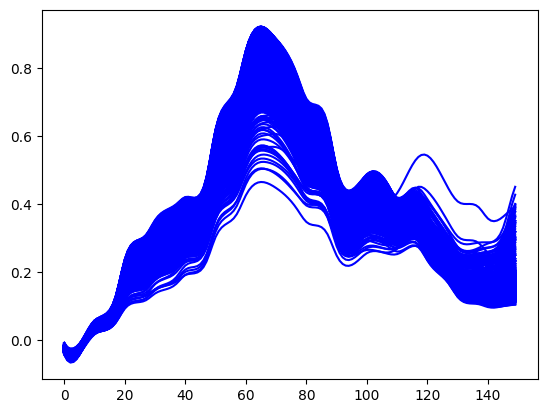

In [124]:
for a in range(0,allPixelNDVIPoly.shape[0]):
    plt.plot(range(0,150),allPixelNDVIPoly[a,:],color='blue')

print(allPixelNDVIPoly.shape)
plt.show()

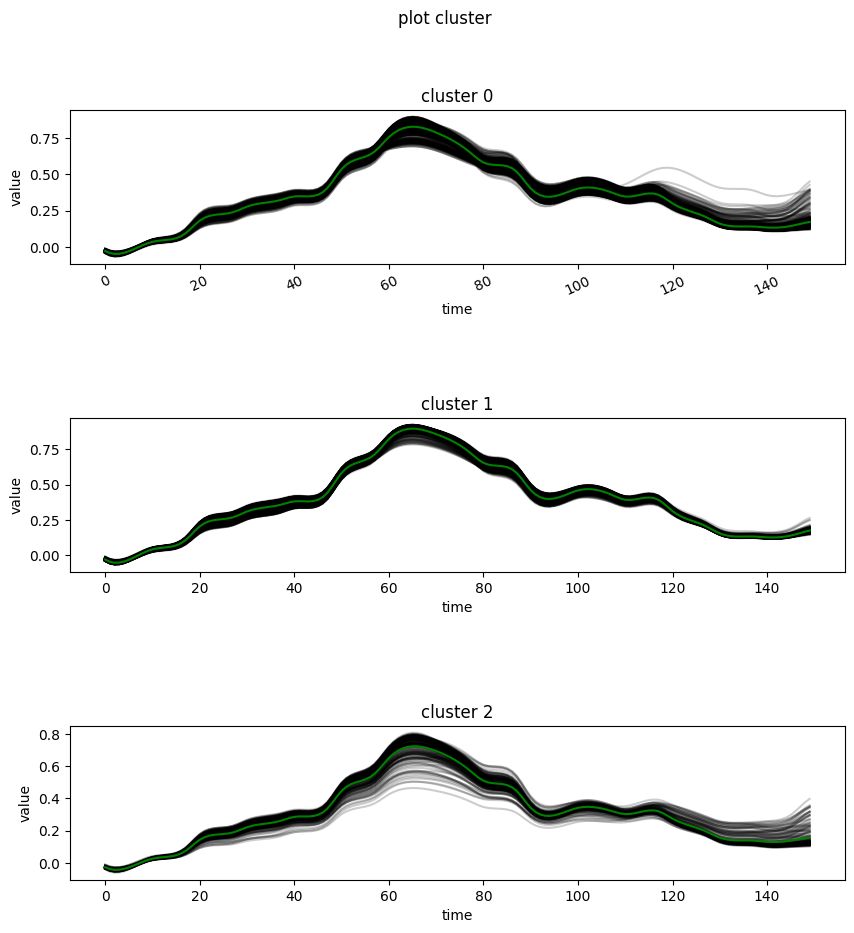

In [125]:
num_cluster = 3

km = TimeSeriesKMeans(n_clusters=num_cluster, metric="euclidean", max_iter=100,
                      random_state=0)
y_pred = km.fit_predict(allPixelNDVIPoly)

fig, axs = plt.subplots(nrows=num_cluster, ncols=1, figsize=(10, 10))
plt.subplots_adjust(hspace=1)
fig.suptitle('plot cluster')
plt.sca(axs[0])
plt.xticks(rotation=25) # Rotate label

for b in range(0,num_cluster):
    
    for xx in allPixelNDVIPoly[y_pred == b]:
        axs[b].plot(xx.ravel(), "k-", alpha=.2)

    axs[b].plot(range(0,150),km.cluster_centers_[b].ravel(),color="green")
    axs[b].set_title("cluster "+str(b))
    axs[b].set_xlabel("time")
    axs[b].set_ylabel("value")
    plt.sca(axs[b])

plt.show()

# Stampa migliore dei tre cluster insieme

C:\Users\pc\AppData\Local\Temp\ipykernel_18688\2457642791.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  axs.plot(xx.ravel(), "k-", alpha=0.01,color="green")
C:\Users\pc\AppData\Local\Temp\ipykernel_18688\2457642791.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  axs.plot(xx.ravel(), "k-", alpha=transparent,color="red")
C:\Users\pc\AppData\Local\Temp\ipykernel_18688\2457642791.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  axs.plot(xx.ravel(), "k-", alpha=transparent,color="purple")


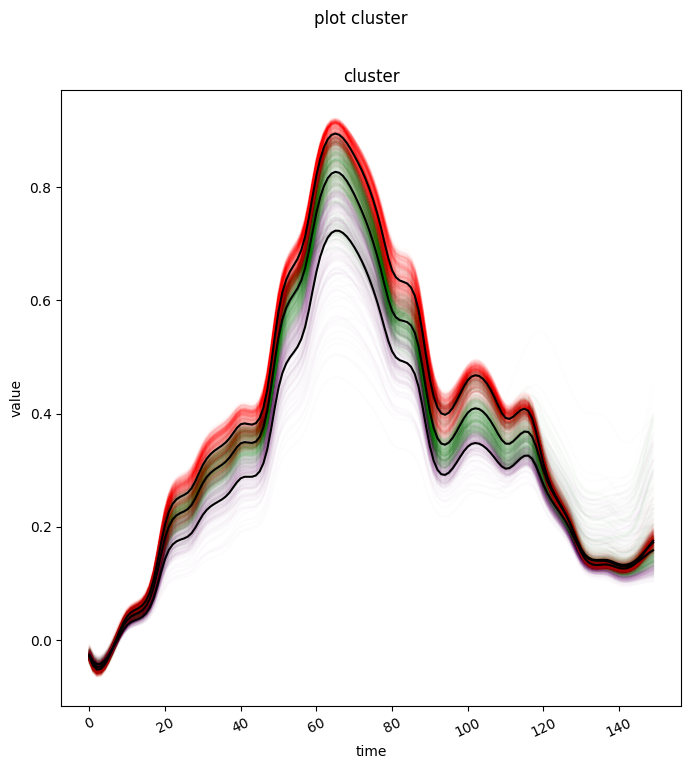

In [126]:
transparent = 0.01

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.suptitle('plot cluster')
plt.sca(axs)
plt.xticks(rotation=25) # Rotate label

for xx in allPixelNDVIPoly[y_pred == 0]:
        axs.plot(xx.ravel(), "k-", alpha=0.01,color="green")


axs.set_title("cluster")
axs.set_xlabel("time")
axs.set_ylabel("value")

for xx in allPixelNDVIPoly[y_pred == 1]:
        axs.plot(xx.ravel(), "k-", alpha=transparent,color="red")




for xx in allPixelNDVIPoly[y_pred == 2]:
        axs.plot(xx.ravel(), "k-", alpha=transparent,color="purple")

axs.plot(range(0,150),km.cluster_centers_[0],color="black")
axs.plot(range(0,150),km.cluster_centers_[1],color="black")
axs.plot(range(0,150),km.cluster_centers_[2],color="black")

plt.sca(axs)
plt.xticks(rotation=25)
plt.show()

# Cerchiamo il numero K migliore per la nostra operazione di clustering

In [127]:
distortions = []

for i in range(1,11):
    km = TimeSeriesKMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(allPixelNDVIPoly)
    distortions.append(km.inertia_)

# Stampo il grafico

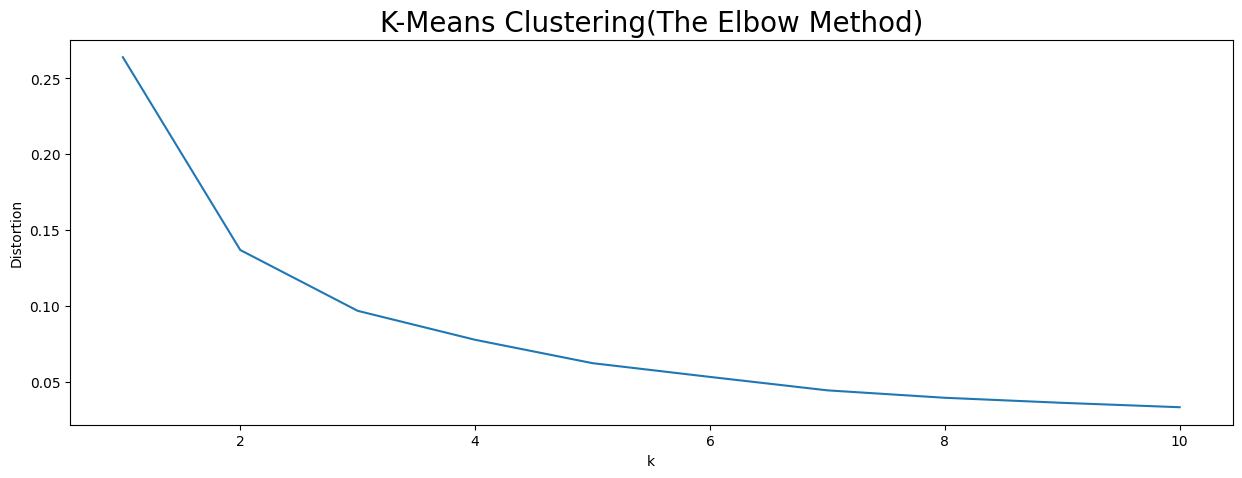

In [128]:
plt.figure(figsize=(15,5))
plt.plot(range(1, 11), distortions)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()

In [129]:
rese_c1 = newResa3[y_pred == 0]
rese_c2 = newResa3[y_pred == 1]
rese_c3 = newResa3[y_pred == 2]
series_c1 = allPixelNDVIPoly[y_pred == 0]
print(rese_c1.shape)
print(series_c1.shape)

(649,)
(649, 150)


# Calcolo della silhoutte dei cluster e di altre metriche

In [130]:
silhouette_score(allPixelNDVIPoly,y_pred,metric="euclidean")

# Calcoliamo il 'centroide' come la media della resa dei cluster

rese = [rese_c1,rese_c2,rese_c3]
meanValue = []

for a in rese:
    meanValue.append(np.mean(a))

# Calcolo le metriche di coesione

coesion = []
separation = []

for a,b in zip(meanValue,rese):   
    sum = 0
    for c in b:
        sum += (c-a)**2
    print(np.sqrt(sum/(len(b)-1)))
    print(len(b))
    coesion.append(np.sqrt(sum/(len(b)-1)))

# Calcolo della separazione

for a in meanValue:
    separation.append([])
    for b in meanValue:
        separation[-1].append(abs(a-b))

print(np.array(separation).shape)
print(meanValue)


982.4676669838171
649
1026.6567173565402
633
1046.144493645517
189
(3, 3)
[7466.4478, 8200.944, 6415.147]


In [131]:
# Calcolo le metriche di separazione

separationResa = []
separationResa.append([])
separationResa.append([])
separationResa.append([])

for a,i in zip(rese,range(0,3)):
    sum = 0
    for b,j in zip(rese,range(0,3)):
        if(i == j):
            continue
        for c in a:
            for d in b:
                sum += abs(c-d)
    separationResa[i].append(sum/(len(newResa3)-len(a)))

# Stampiamo box plot dei cluster

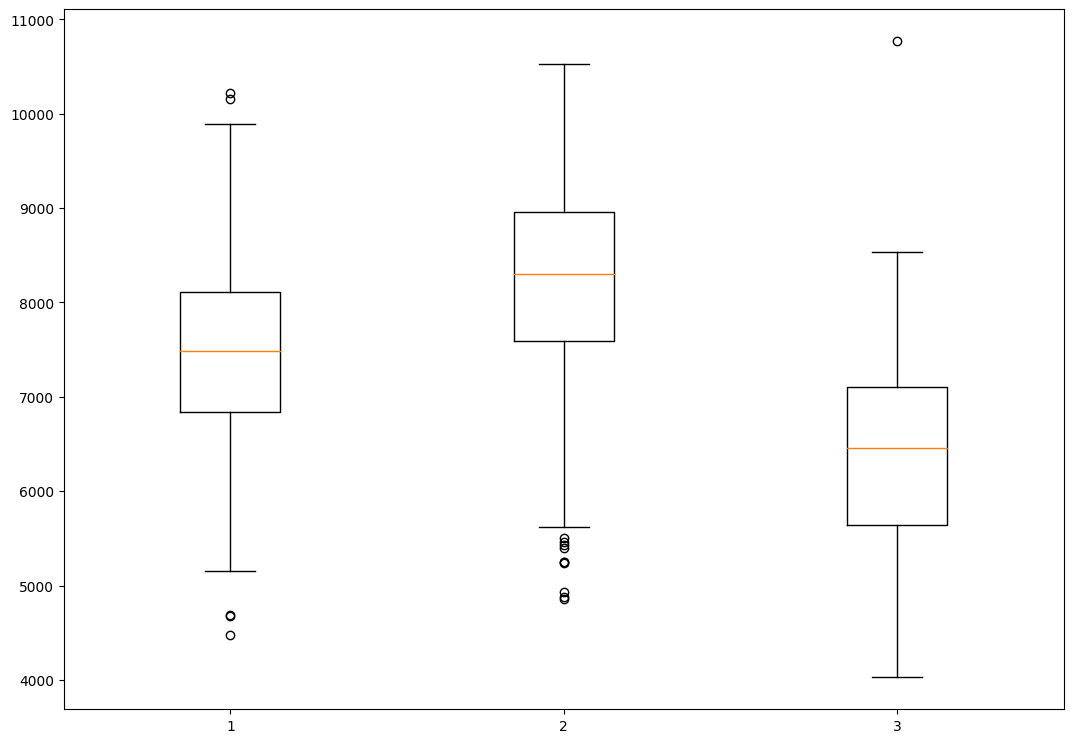

In [132]:

# Creating dataset
np.random.seed(10)

fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot([rese_c1,rese_c2,rese_c3])

# show plot
plt.show()


# Utilizziamo il dbscan per cercare di estrarre i cluster

In [133]:

db = DBSCAN(eps=0.1, min_samples=6).fit(NDVI.data_matrix[:,:,0])
labels = db.labels_


In [134]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 4


# Implementazione della matrice 3D

In [135]:
with open('./pickles/AllPixelBand3.pickle', 'rb') as handle:
    bande3 = pickle.load(handle)
print(bande3.shape) #fix duplicate plot

(1579, 12, 150)


(15, 15)
[[0.77132064 0.02075195 0.63364823 0.74880388 0.49850701 0.22479665
  0.19806286 0.76053071 0.16911084 0.08833981 0.68535982 0.95339335
  0.00394827 0.51219226 0.81262096]
 [0.61252607 0.72175532 0.29187607 0.91777412 0.71457578 0.54254437
  0.14217005 0.37334076 0.67413362 0.44183317 0.43401399 0.61776698
  0.51313824 0.65039718 0.60103895]
 [0.8052232  0.52164715 0.90864888 0.31923609 0.09045935 0.30070006
  0.11398436 0.82868133 0.04689632 0.62628715 0.54758616 0.819287
  0.19894754 0.8568503  0.35165264]
 [0.75464769 0.29596171 0.88393648 0.32551164 0.1650159  0.39252924
  0.09346037 0.82110566 0.15115202 0.38411445 0.94426071 0.98762547
  0.45630455 0.82612284 0.25137413]
 [0.59737165 0.90283176 0.53455795 0.59020136 0.03928177 0.35718176
  0.07961309 0.30545992 0.33071931 0.7738303  0.03995921 0.42949218
  0.31492687 0.63649114 0.34634715]
 [0.04309736 0.87991517 0.76324059 0.87809664 0.41750914 0.60557756
  0.51346663 0.59783665 0.26221566 0.30087131 0.02539978 0.303062

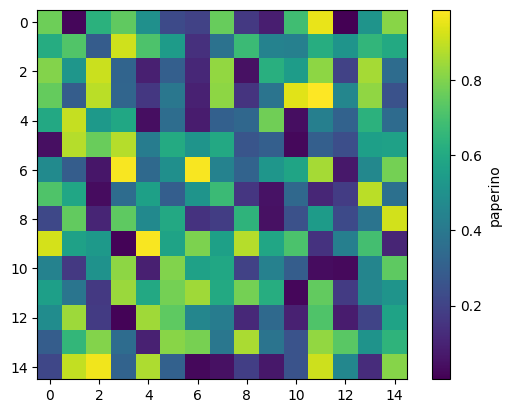

In [136]:
a = np.diag(range(15))

print(a.shape)
b = np.random.rand(15,15)
print(b)
plt.imshow(b)

#plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='paperino')
plt.colorbar(label='paperino')
plt.show()

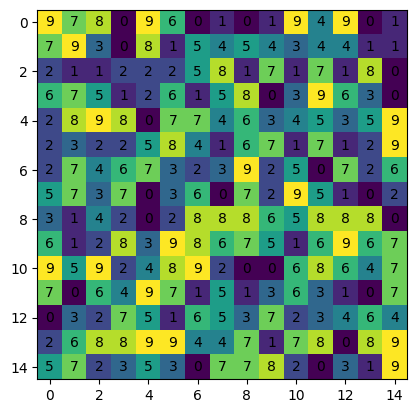

In [137]:
fig, ax = plt.subplots()

min_val, max_val = 0, 15

intersection_matrix = np.random.randint(0, 10, size=(max_val, max_val))

ax.imshow(intersection_matrix)

for i in range(min_val,max_val):
    for j in range(0,15):
        c = intersection_matrix[j,i]
        ax.text(i, j, str(c), va='center', ha='center')

# Esempio di analisi di uno step temporale

In [138]:
durata = 150-50
starting_point = 5

new_series = allPixelNDVIPoly[:,starting_point:durata]

num_cluster = 3

km = TimeSeriesKMeans(n_clusters=num_cluster, metric="euclidean", max_iter=25,
                      random_state=0)
y_pred = km.fit_predict(new_series)

rese_c1 = newResa3[y_pred == 0]
rese_c2 = newResa3[y_pred == 1]
rese_c3 = newResa3[y_pred == 2]

In [139]:
silhouette_score(allPixelNDVIPoly,y_pred,metric="euclidean")

# Calcoliamo il 'centroide' come la media della resa dei cluster

rese = [rese_c1,rese_c2,rese_c3]
meanValue = []

for a in rese:
    meanValue.append(np.mean(a))

# Calcolo le metriche di coesione

coesion = []
separation = []

for a,b in zip(meanValue,rese):   
    sum = 0
    for c in b:
        sum += (c-a)**2
    print(np.sqrt(sum/(len(b)-1)))
    print(len(b))
    coesion.append(np.sqrt(sum/(len(b)-1)))

# Calcolo della separazione

for a in meanValue:
    separation.append([])
    for b in meanValue:
        separation[-1].append(abs(a-b))


1008.7689729291504
655
1003.1680736216208
660
1052.1900349778355
156


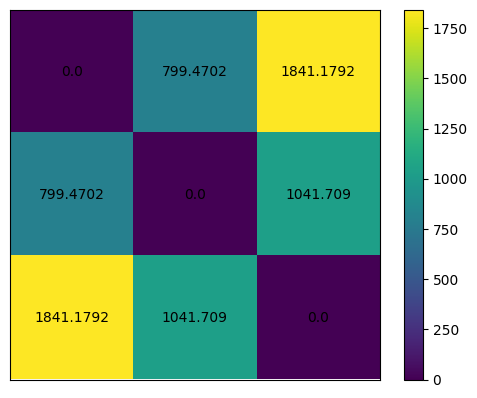

In [140]:
import matplotlib as mpl

fig, ax = plt.subplots()

separation = np.array(separation)
image = ax.imshow(separation)

'''ax.tick_params(axis='y',          
        which='both',      
        bottom=False,      
        top=False,         
        labelbottom=False)

ax.tick_params(axis='x',          
        which='both',      
        bottom=False,      
        top=False,         
        labelbottom=False)'''

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)


fig.colorbar(image)

for i in range(0,num_cluster):
    for j in range(0,num_cluster):
        c = separation[i,j]
        ax.text(i, j, str(c), va='center', ha='center')

# Iterativo

In [141]:
# Global
num_cluster = 3
kmeans_total = []
newSeries_total = []

for a in range(0,155,5):
    kmeans_total.append([])
    newSeries_total.append([])
    for b in range(0,155,5):
        new_series = allPixelNDVIPoly[:,a:150-b]

        km = TimeSeriesKMeans(n_clusters=num_cluster, metric="euclidean", max_iter=25,
                      random_state=0)
        if(new_series.shape[1] != 0):
            y_pred = km.fit_predict(new_series)
            kmeans_total[-1].append(y_pred)
            newSeries_total[-1].append(new_series)


        


In [142]:
num_cluster = 3
silhoutte = []

for a,s in zip(kmeans_total,newSeries_total):
    silhoutte.append([])
    for y_pred,new_series in zip(a,s):
        silhoutte[-1].append(silhouette_score(new_series,y_pred,metric="euclidean"))

        


In [143]:
# Abbiamo una matrice triangolare incompleta, dobbiamo riempirla.

matrice_silhoutte = np.zeros([int(155/5),int(155/5)])

for a,x in zip(silhoutte,range(0,int(150/5))):
    for c,y in zip(a,range(0,len(a))):
        matrice_silhoutte[x,y] = c


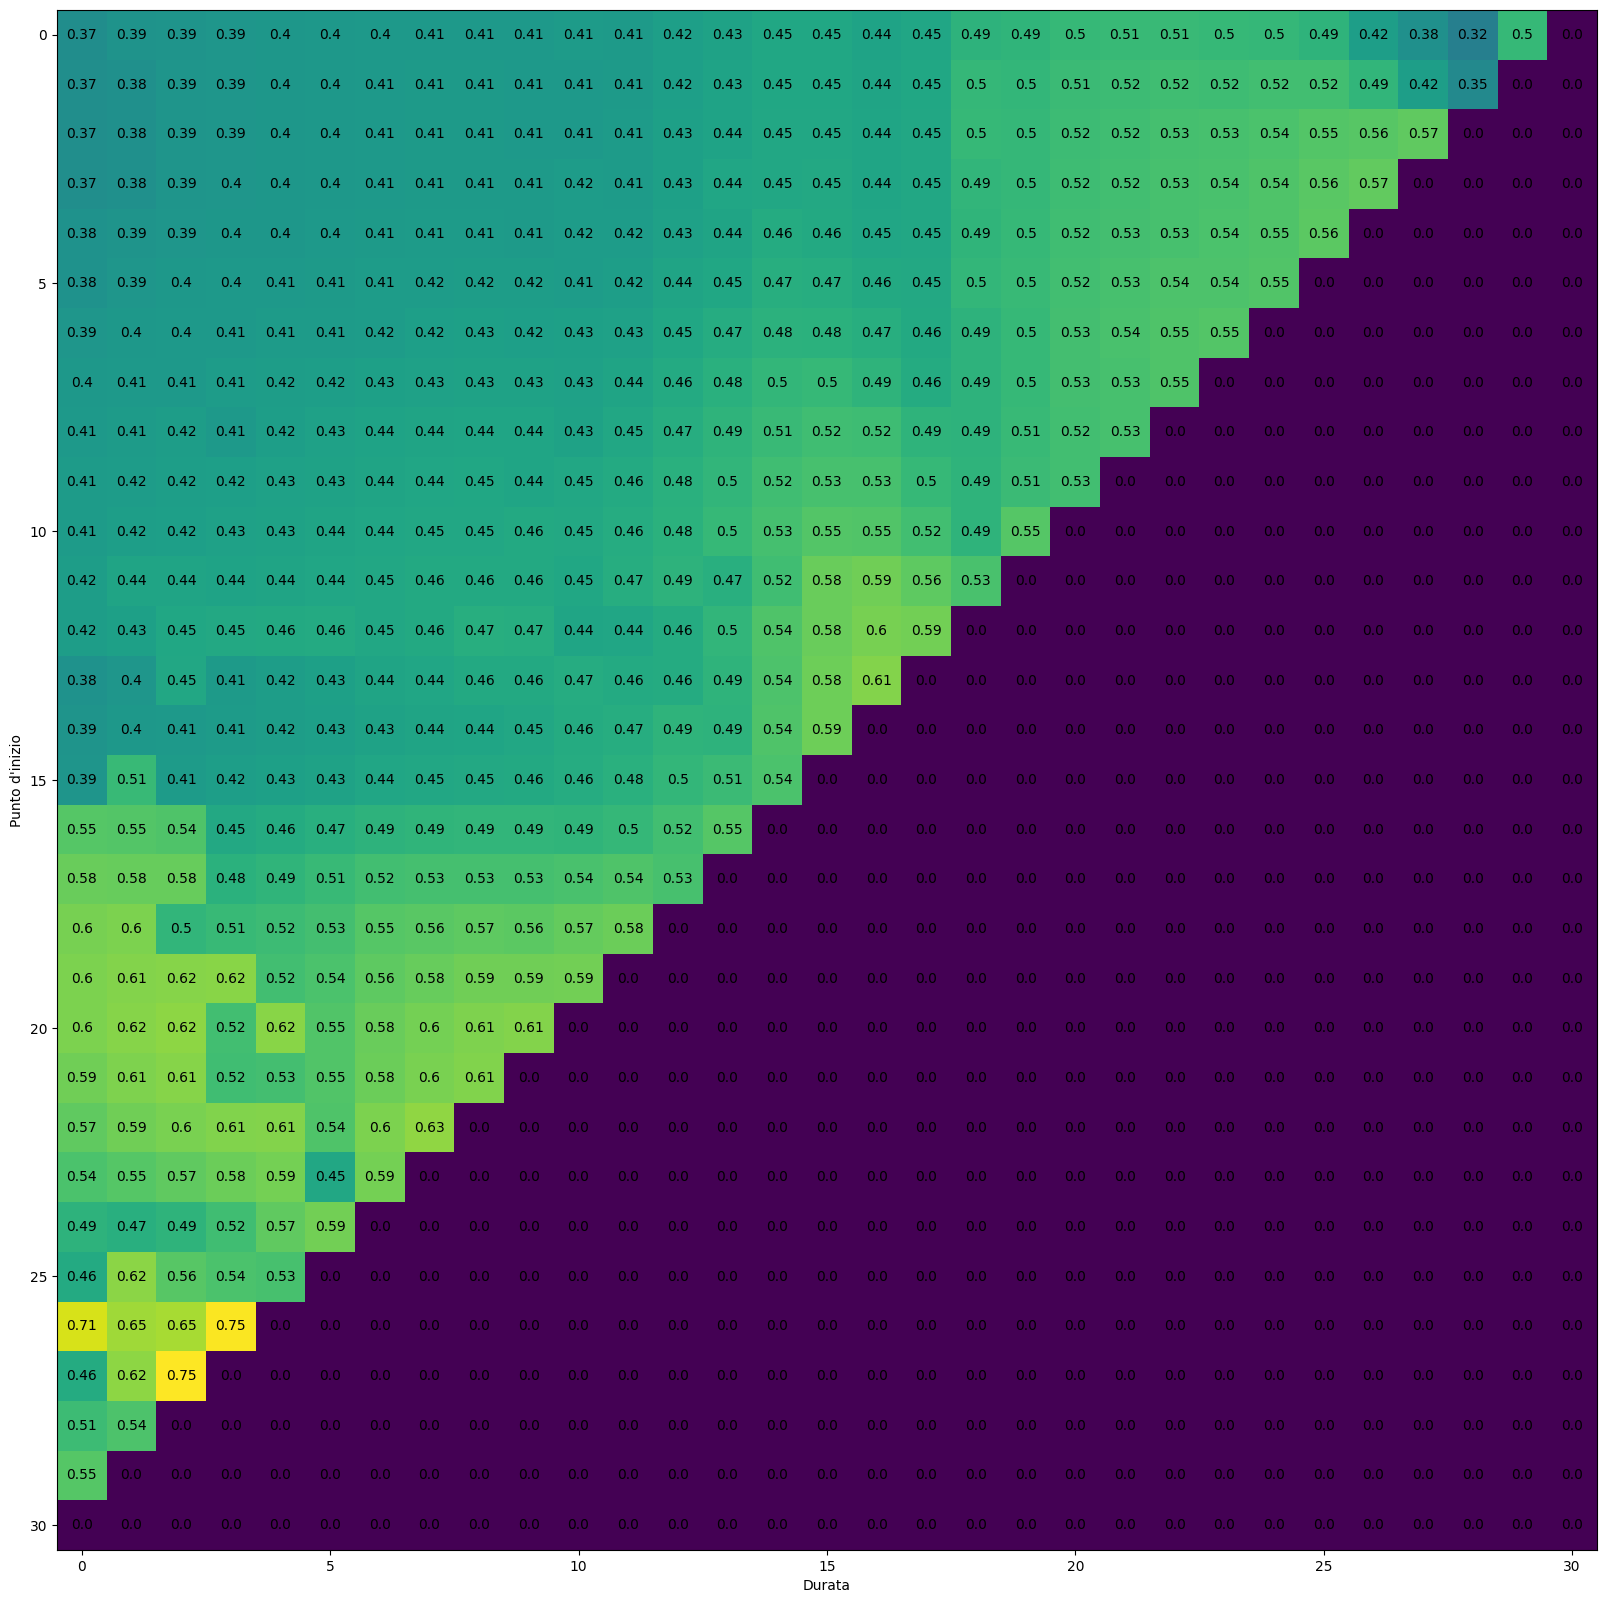

In [144]:
import matplotlib as mpl

fig, ax = plt.subplots()

image = ax.imshow(matrice_silhoutte)

plt.xlabel("Durata")
plt.ylabel("Punto d'inizio")

fig.set_size_inches(20,20)

for i in range(0,matrice_silhoutte.shape[0]):
    for j in range(0,matrice_silhoutte.shape[1]):
        c = np.round(matrice_silhoutte[i,j],decimals=2)
        ax.text(j, i, str(c), va='center', ha='center')

In [145]:
num_cluster = 3
result = []
cluster_deviation = []
cluster_deviation.append([])
cluster_deviation.append([])
cluster_deviation.append([])

for a,s in zip(kmeans_total,newSeries_total):
    result.append([])
    cluster_deviation[0].append([])
    cluster_deviation[1].append([])
    cluster_deviation[2].append([])
    for y_pred,new_series in zip(a,s):
        rese_c1 = newResa3[y_pred == 0]
        rese_c2 = newResa3[y_pred == 1]
        rese_c3 = newResa3[y_pred == 2]

        rese = [rese_c1,rese_c2,rese_c3]
        meanValue = []

        for resa in rese:
            meanValue.append(np.mean(resa))

    # Calcolo le metriche di coesione
        coesion = []

        for mean,resa,cluster in zip(meanValue,rese,cluster_deviation):   
            sum = 0
            cluster[-1].append([])
            for c in resa:
                sum += (c-mean)**2
            
            coesion.append(np.sqrt(sum/(len(resa)-1)))
            cluster[-1][-1].append(np.sqrt(sum/(len(resa)-1)))
        result[-1].append(np.array(coesion).mean())

            


In [146]:
# Abbiamo una matrice triangolare incompleta, dobbiamo riempirla.

matrice_meanDeviation = np.zeros([int(155/5),int(155/5)])

for a,x in zip(result,range(0,int(155/5))):
    for c,y in zip(a,range(0,len(a))):
        matrice_meanDeviation[x,y] = c

"for i in range(0,num_cluster):\n    for j in range(0,num_cluster):\n        c = matrice_silhoutte[i,j]\n        ax.text(i, j, str(c), va='center', ha='center')"

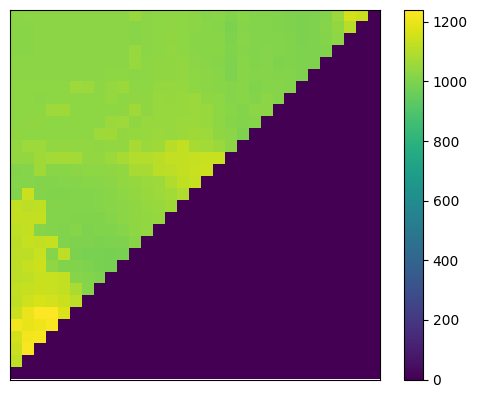

In [147]:
import matplotlib as mpl

fig, ax = plt.subplots()

image = ax.imshow(matrice_meanDeviation)


ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)


fig.colorbar(image)

'''for i in range(0,num_cluster):
    for j in range(0,num_cluster):
        c = matrice_silhoutte[i,j]
        ax.text(i, j, str(c), va='center', ha='center')'''

In [148]:
print(np.median(np.array(newResa3)))
print(np.std(np.array(newResa3)))
print(np.mean(np.array(newResa3)))


7708.3
1165.9009
7647.4404


# Iterativo per un cluster

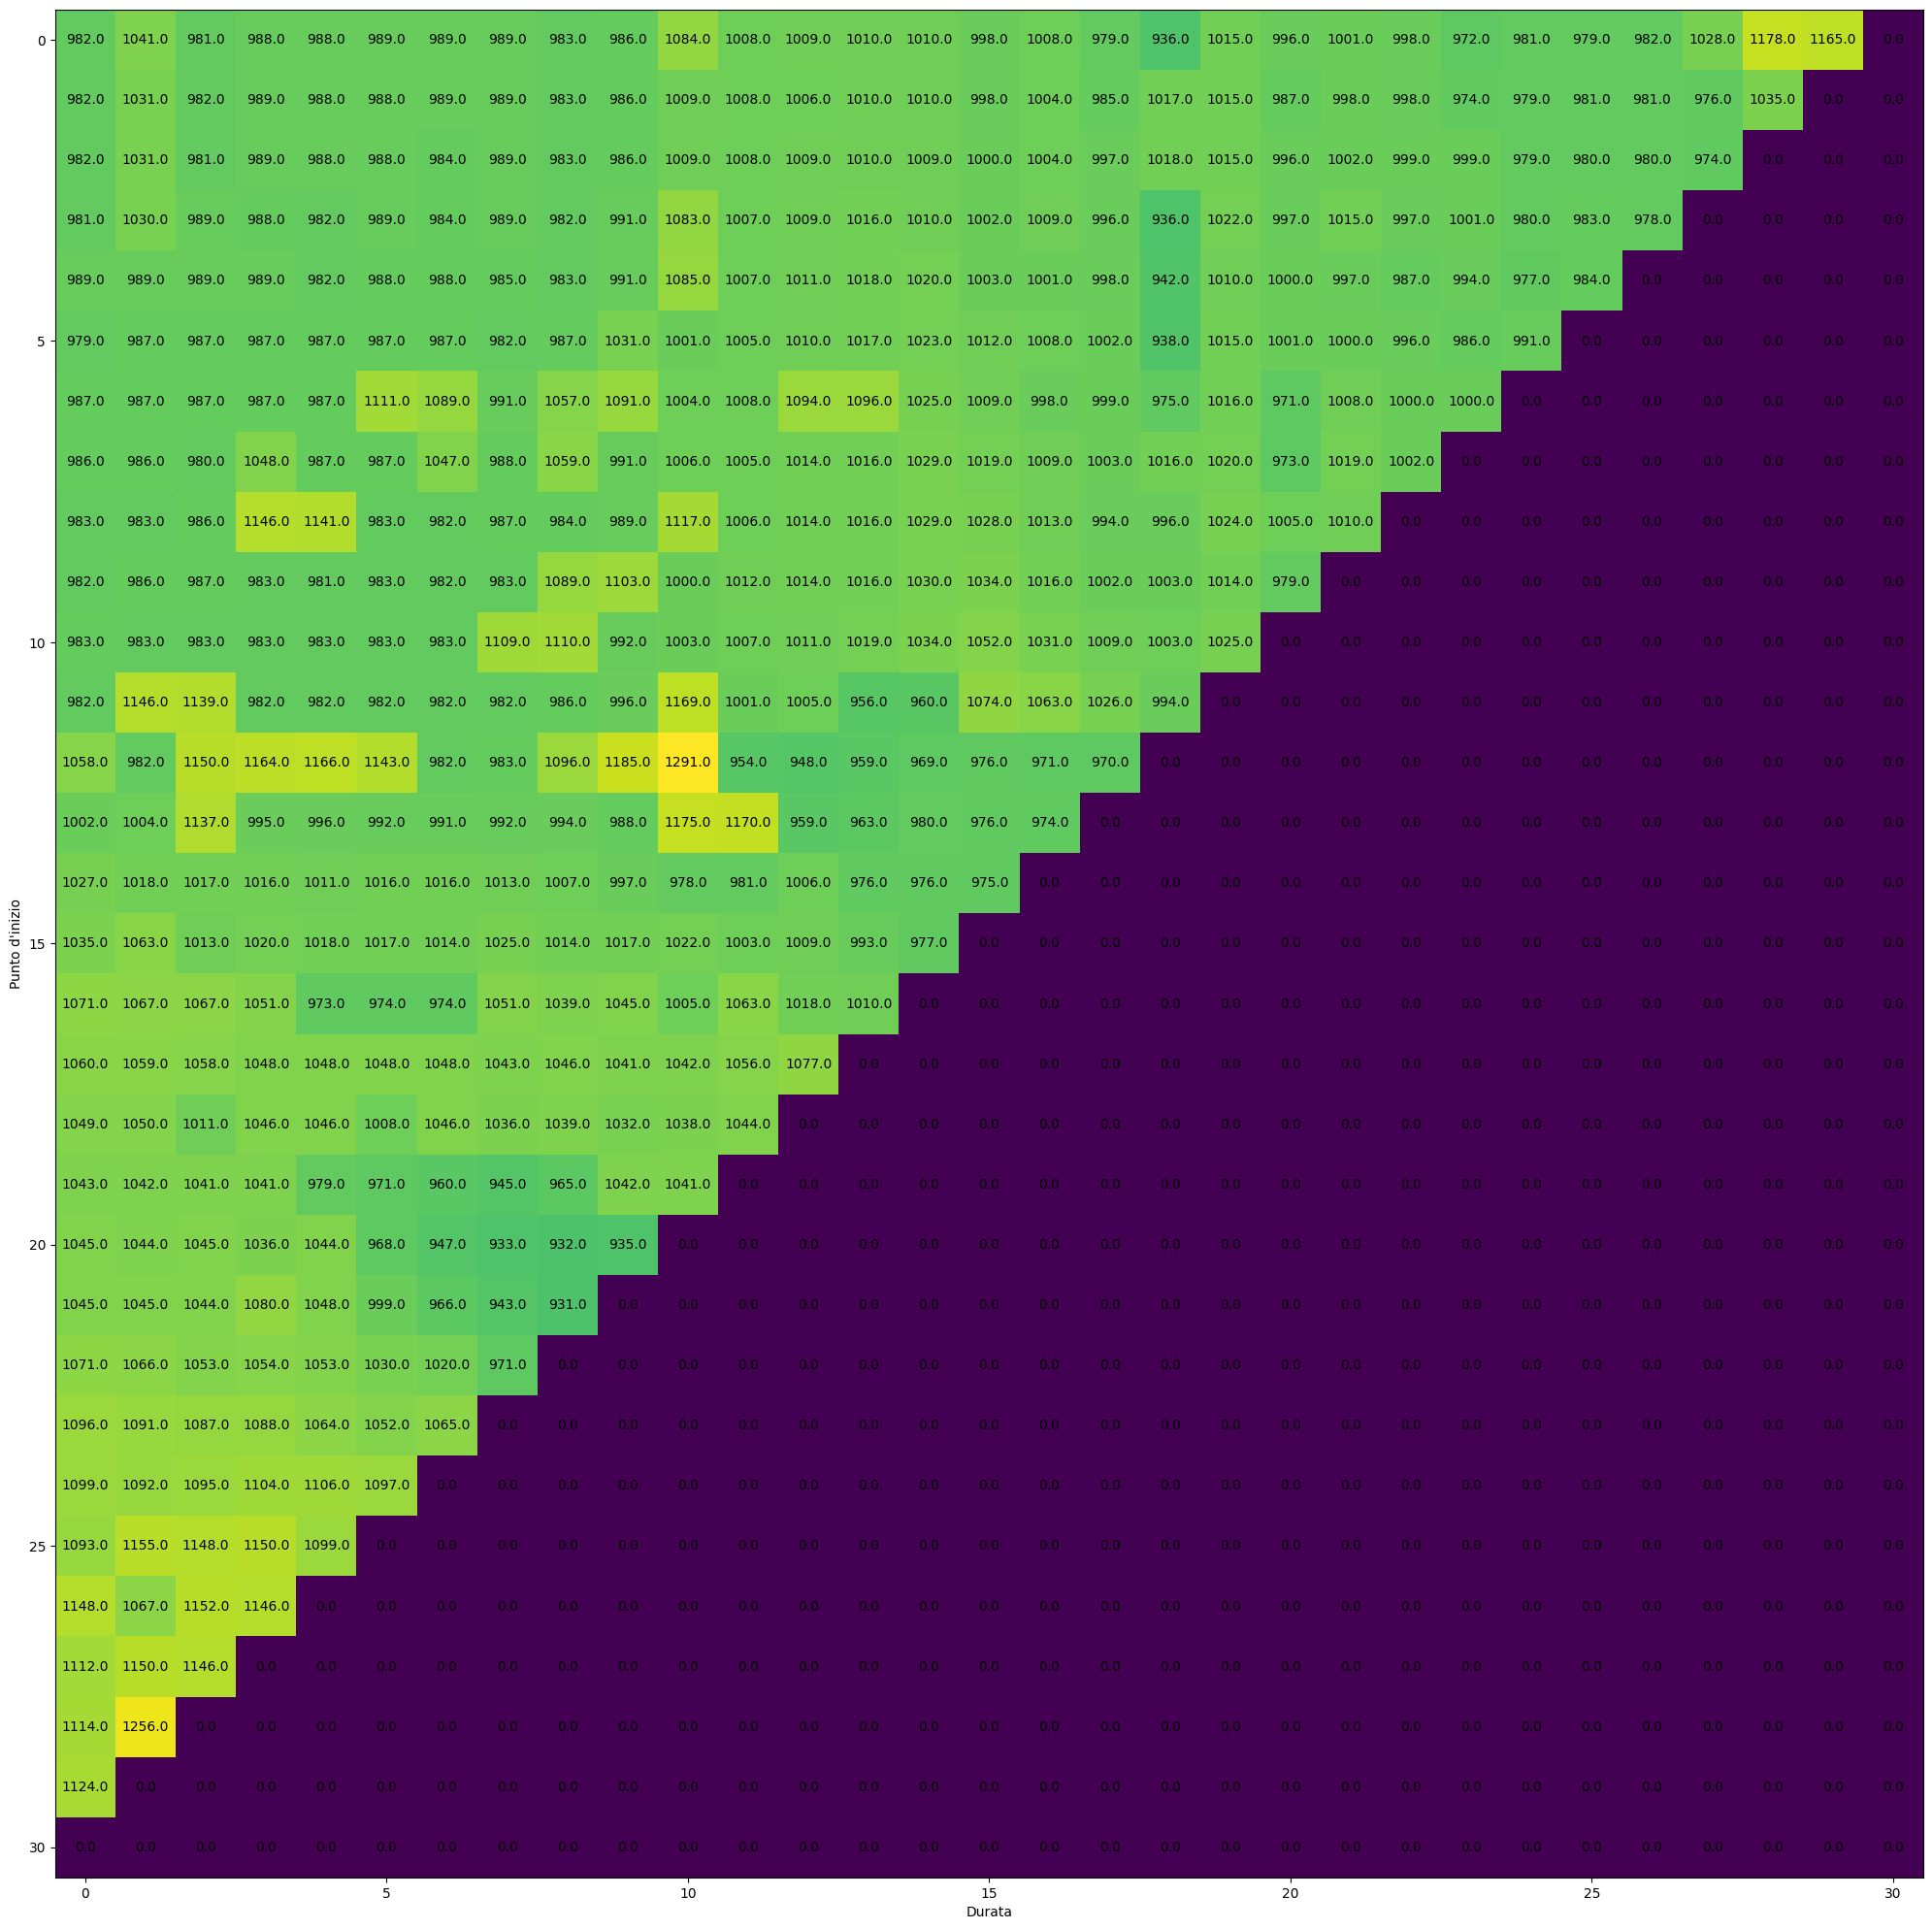

In [149]:
# Abbiamo una matrice triangolare incompleta, dobbiamo riempirla.

m_deviation = np.zeros([int(155/5),int(155/5),3])

for cluster,z in zip(cluster_deviation,range(0,3)):
    for a,x in zip(cluster,range(0,int(155/5))):
        for c,y in zip(a,range(0,len(a))):
            m_deviation[x,y,z] = c[0]

import matplotlib as mpl

fig, ax = plt.subplots()

image = ax.imshow(m_deviation[:,:,0])


plt.xlabel("Durata")
plt.ylabel("Punto d'inizio")

fig.set_size_inches(25,25)
for i in range(0,m_deviation.shape[0]):
    for j in range(0,m_deviation.shape[1]):
        c = np.round(m_deviation[i,j,0],decimals=0)
        ax.text(j, i, str(c), va='center', ha='center')

# Analisi della separazione

In [150]:
# Calcolo della metrica di coesione
separation = []
num_cluster = 3
result_sepa = []

for a,s in zip(kmeans_total,newSeries_total):
    separation.append([])
    result_sepa.append([])
    for y_pred,new_series in zip(a,s):
        rese_c1 = newResa3[y_pred == 0]
        rese_c2 = newResa3[y_pred == 1]
        rese_c3 = newResa3[y_pred == 2]

        rese = [rese_c1,rese_c2,rese_c3]
        meanValue = []

        for resa in rese:
            meanValue.append(np.mean(resa))
        separation[-1].append([])
        for a,i in zip(meanValue,range(0,num_cluster)):
            
            for b,j in zip(meanValue,range(0,num_cluster)):
                if( i >= j):
                    continue
                else:
                    separation[-1][-1].append(abs(a-b))
            


In [151]:
print(np.array(separation).shape)
print(len(separation[29]))
print(separation[29])

(31,)
1
[[341.57764, 839.3545, 497.77686]]


C:\Users\pc\AppData\Local\Temp\ipykernel_18688\594937865.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(separation).shape)


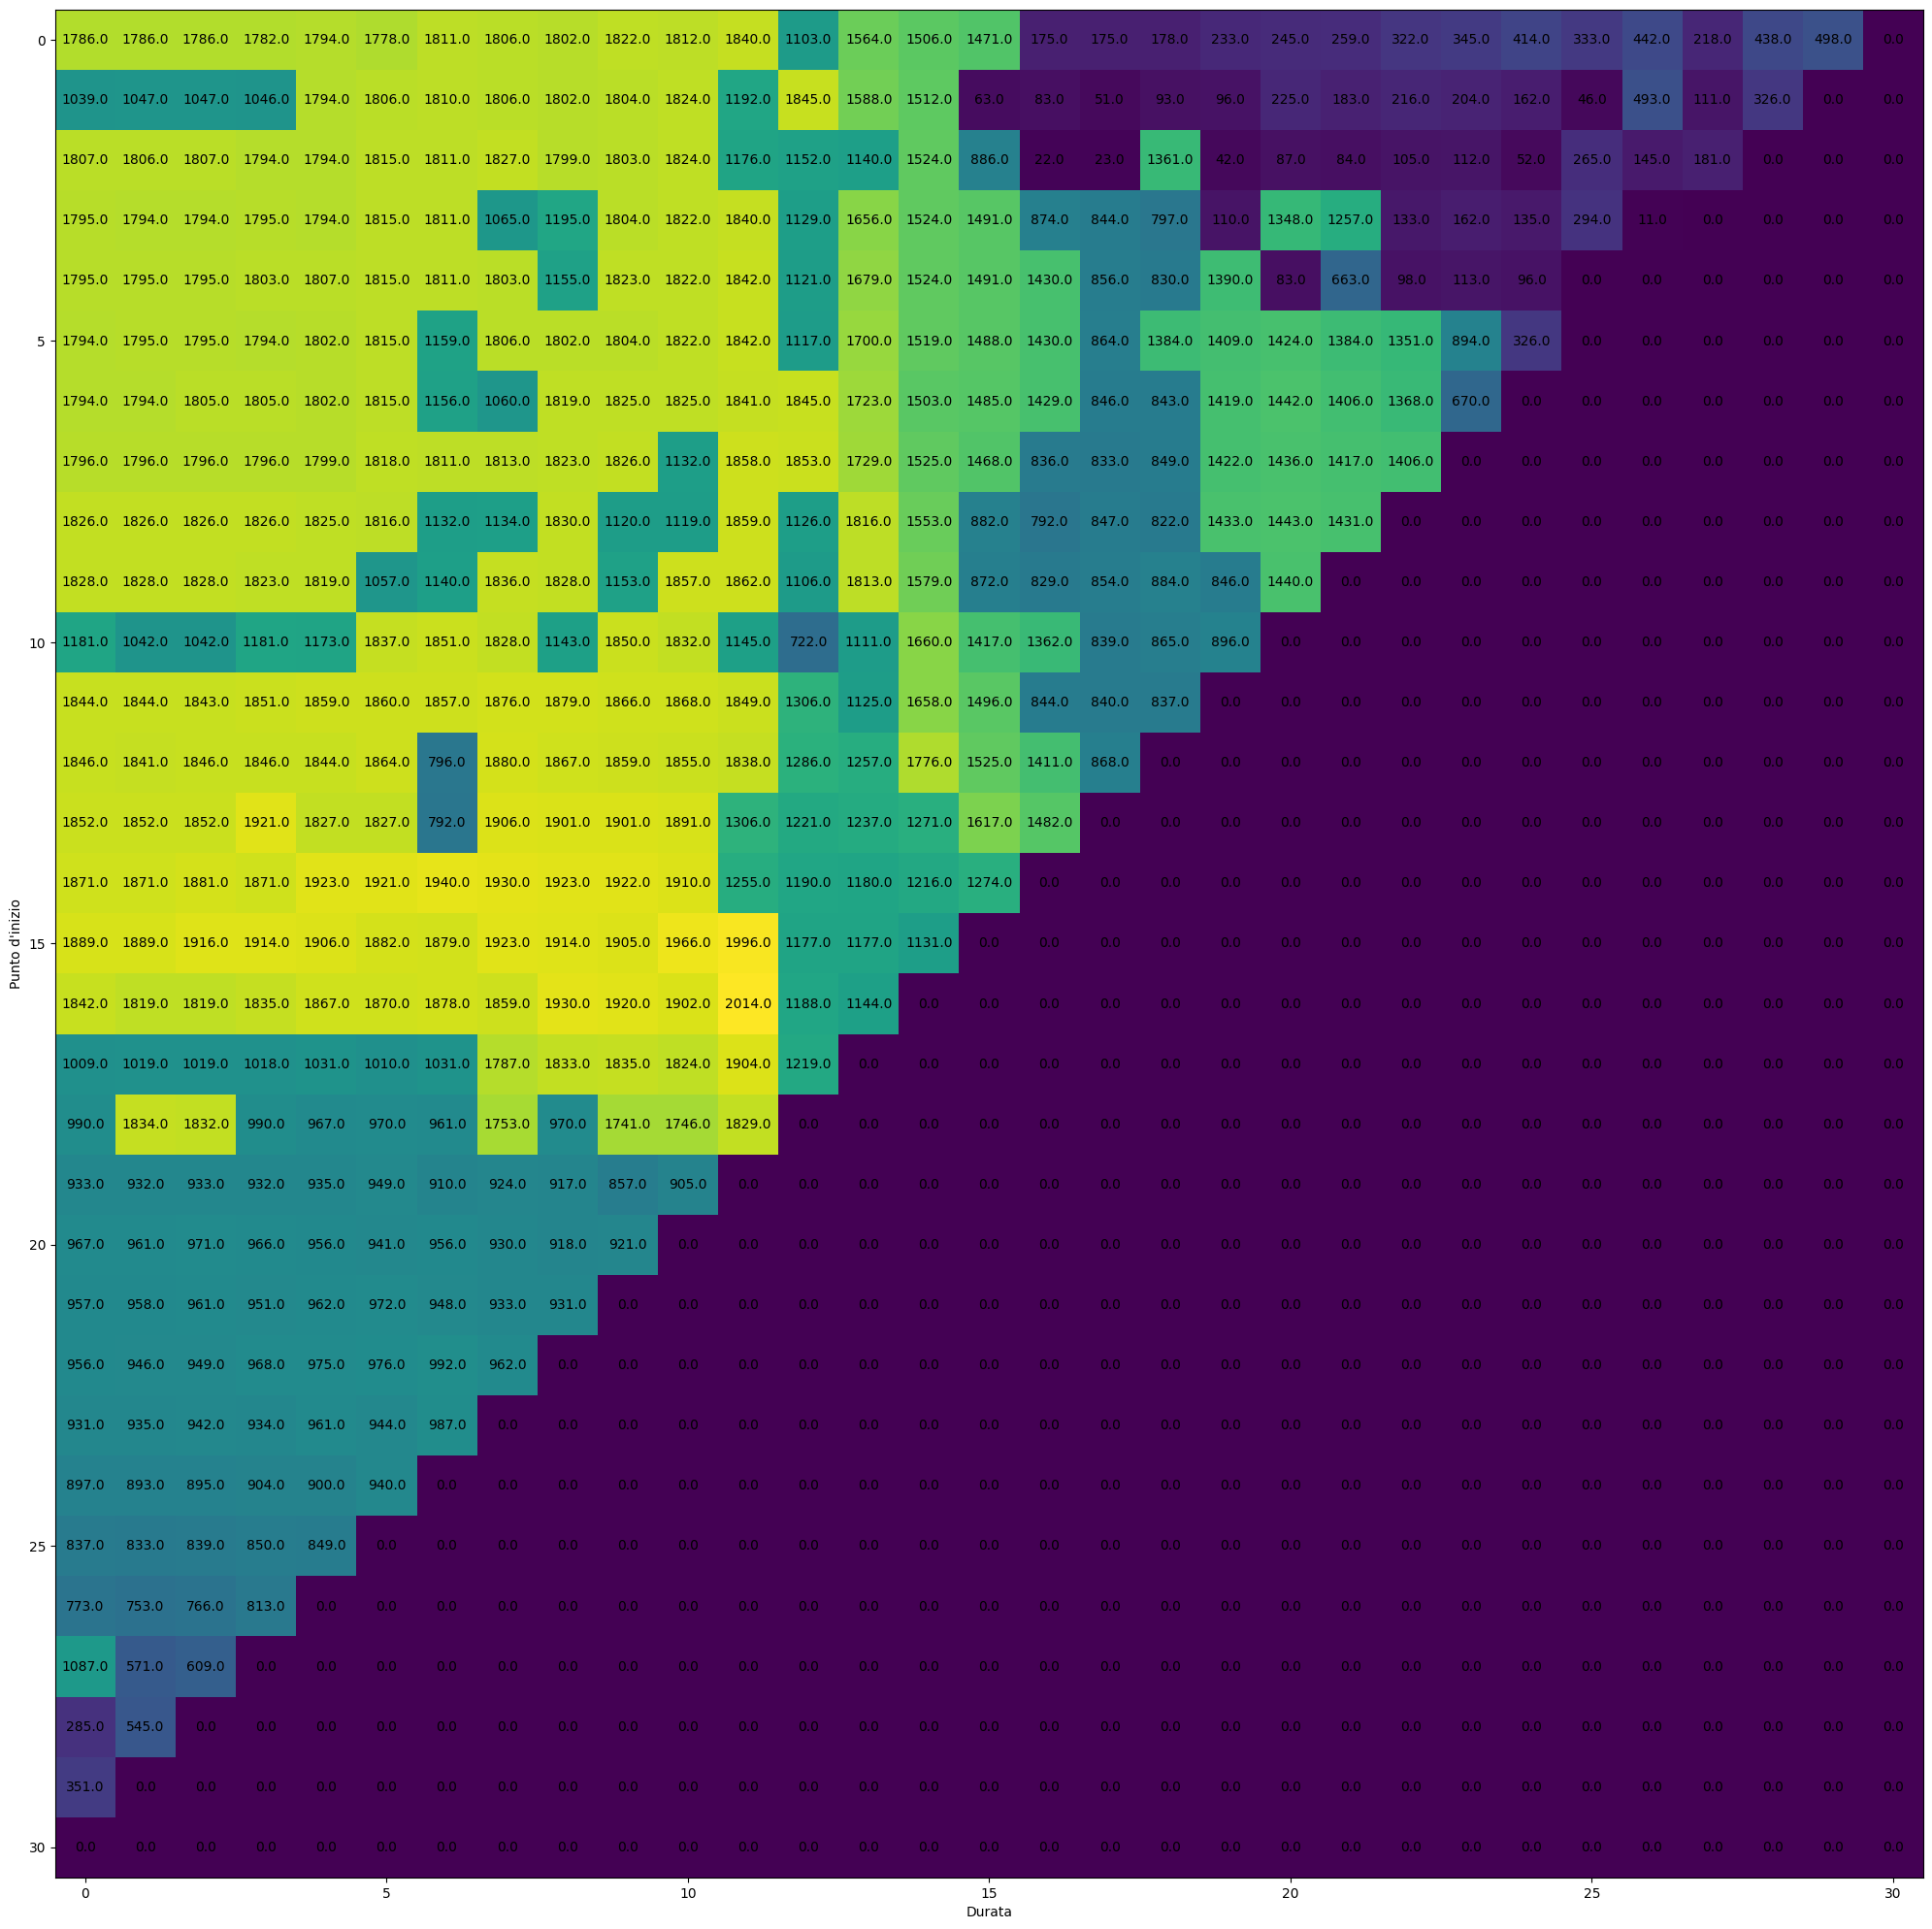

In [152]:
# Abbiamo una matrice triangolare incompleta, dobbiamo riempirla.

current_cluster = 2

m_separation = np.zeros([int(155/5),int(155/5),3])

for cluster,y in zip(separation,range(0,int(155/5))):
    
    for a,x in zip(cluster,range(0,len(cluster))):
        for c,z in zip(a,range(0,num_cluster)):
            m_separation[x,y,z] = c

import matplotlib as mpl

fig, ax = plt.subplots()

image = ax.imshow(m_separation[:,:,current_cluster])

plt.xlabel("Durata")
plt.ylabel("Punto d'inizio")

fig.set_size_inches(25,25)
for i in range(0,m_separation.shape[0]):
    for j in range(0,m_separation.shape[1]):
        c = np.round(m_separation[i,j,current_cluster],decimals=0)
        ax.text(j, i, str(c), va='center', ha='center')

(31, 31)


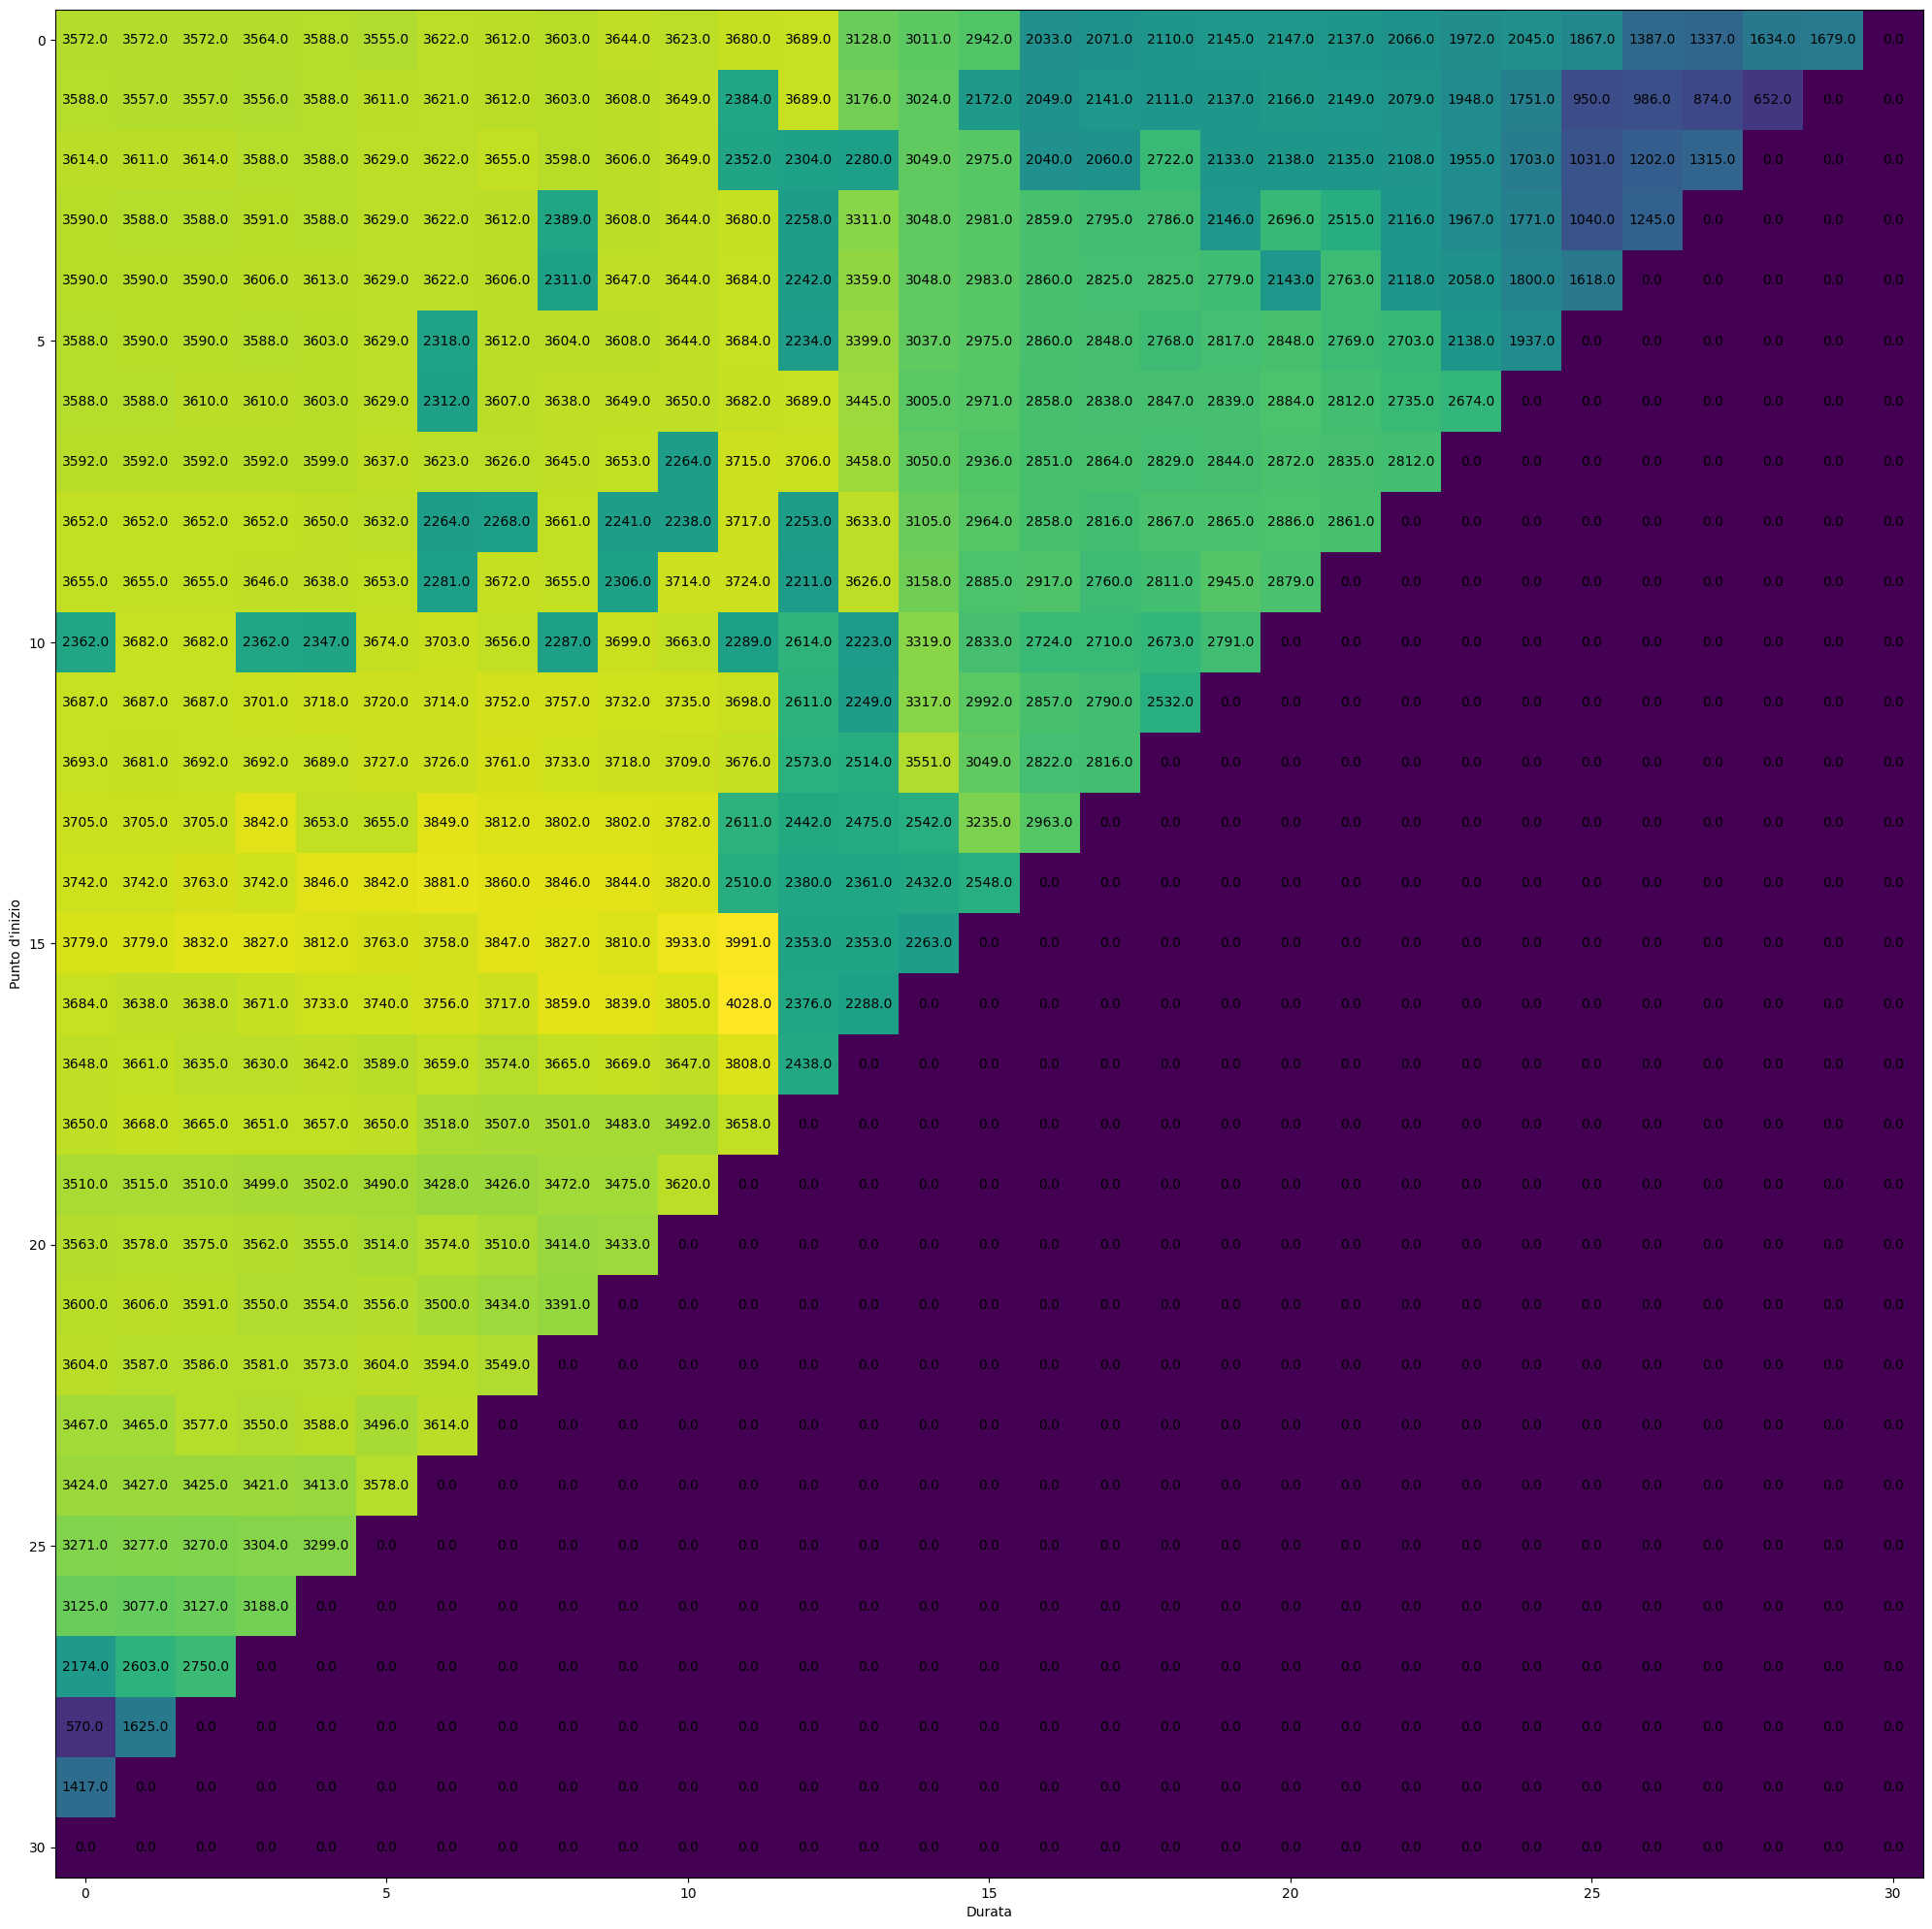

In [153]:
import matplotlib as mpl

fig, ax = plt.subplots()

total = (m_separation[:,:,0]+m_separation[:,:,1]+m_separation[:,:,2])
print(total.shape)
image = ax.imshow(total)


plt.xlabel("Durata")
plt.ylabel("Punto d'inizio")

fig.set_size_inches(25,25)
for i in range(0,total.shape[0]):
    for j in range(0,total.shape[1]):
        c = np.round(total[i,j],decimals=0)
        ax.text(j, i, str(c), va='center', ha='center')

# Calcolo della media di un cluster

In [154]:
num_cluster = 3

cluster_mean = []


for a,s in zip(kmeans_total,newSeries_total):
    cluster_mean.append([])
    for y_pred,new_series in zip(a,s):
        rese_c1 = newResa3[y_pred == 0]
        rese_c2 = newResa3[y_pred == 1]
        rese_c3 = newResa3[y_pred == 2]

        rese = [rese_c1,rese_c2,rese_c3]
        meanValue = []

        for resa in rese:
            meanValue.append(np.mean(resa))
        cluster_mean[-1].append(meanValue)

In [155]:
print(np.array(cluster_mean).shape)
print(len(cluster_mean[0]))
print(cluster_mean[0][29])

(31,)
30
[7236.7695, 7945.1675, 7594.255]


C:\Users\pc\AppData\Local\Temp\ipykernel_18688\1121105241.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(cluster_mean).shape)


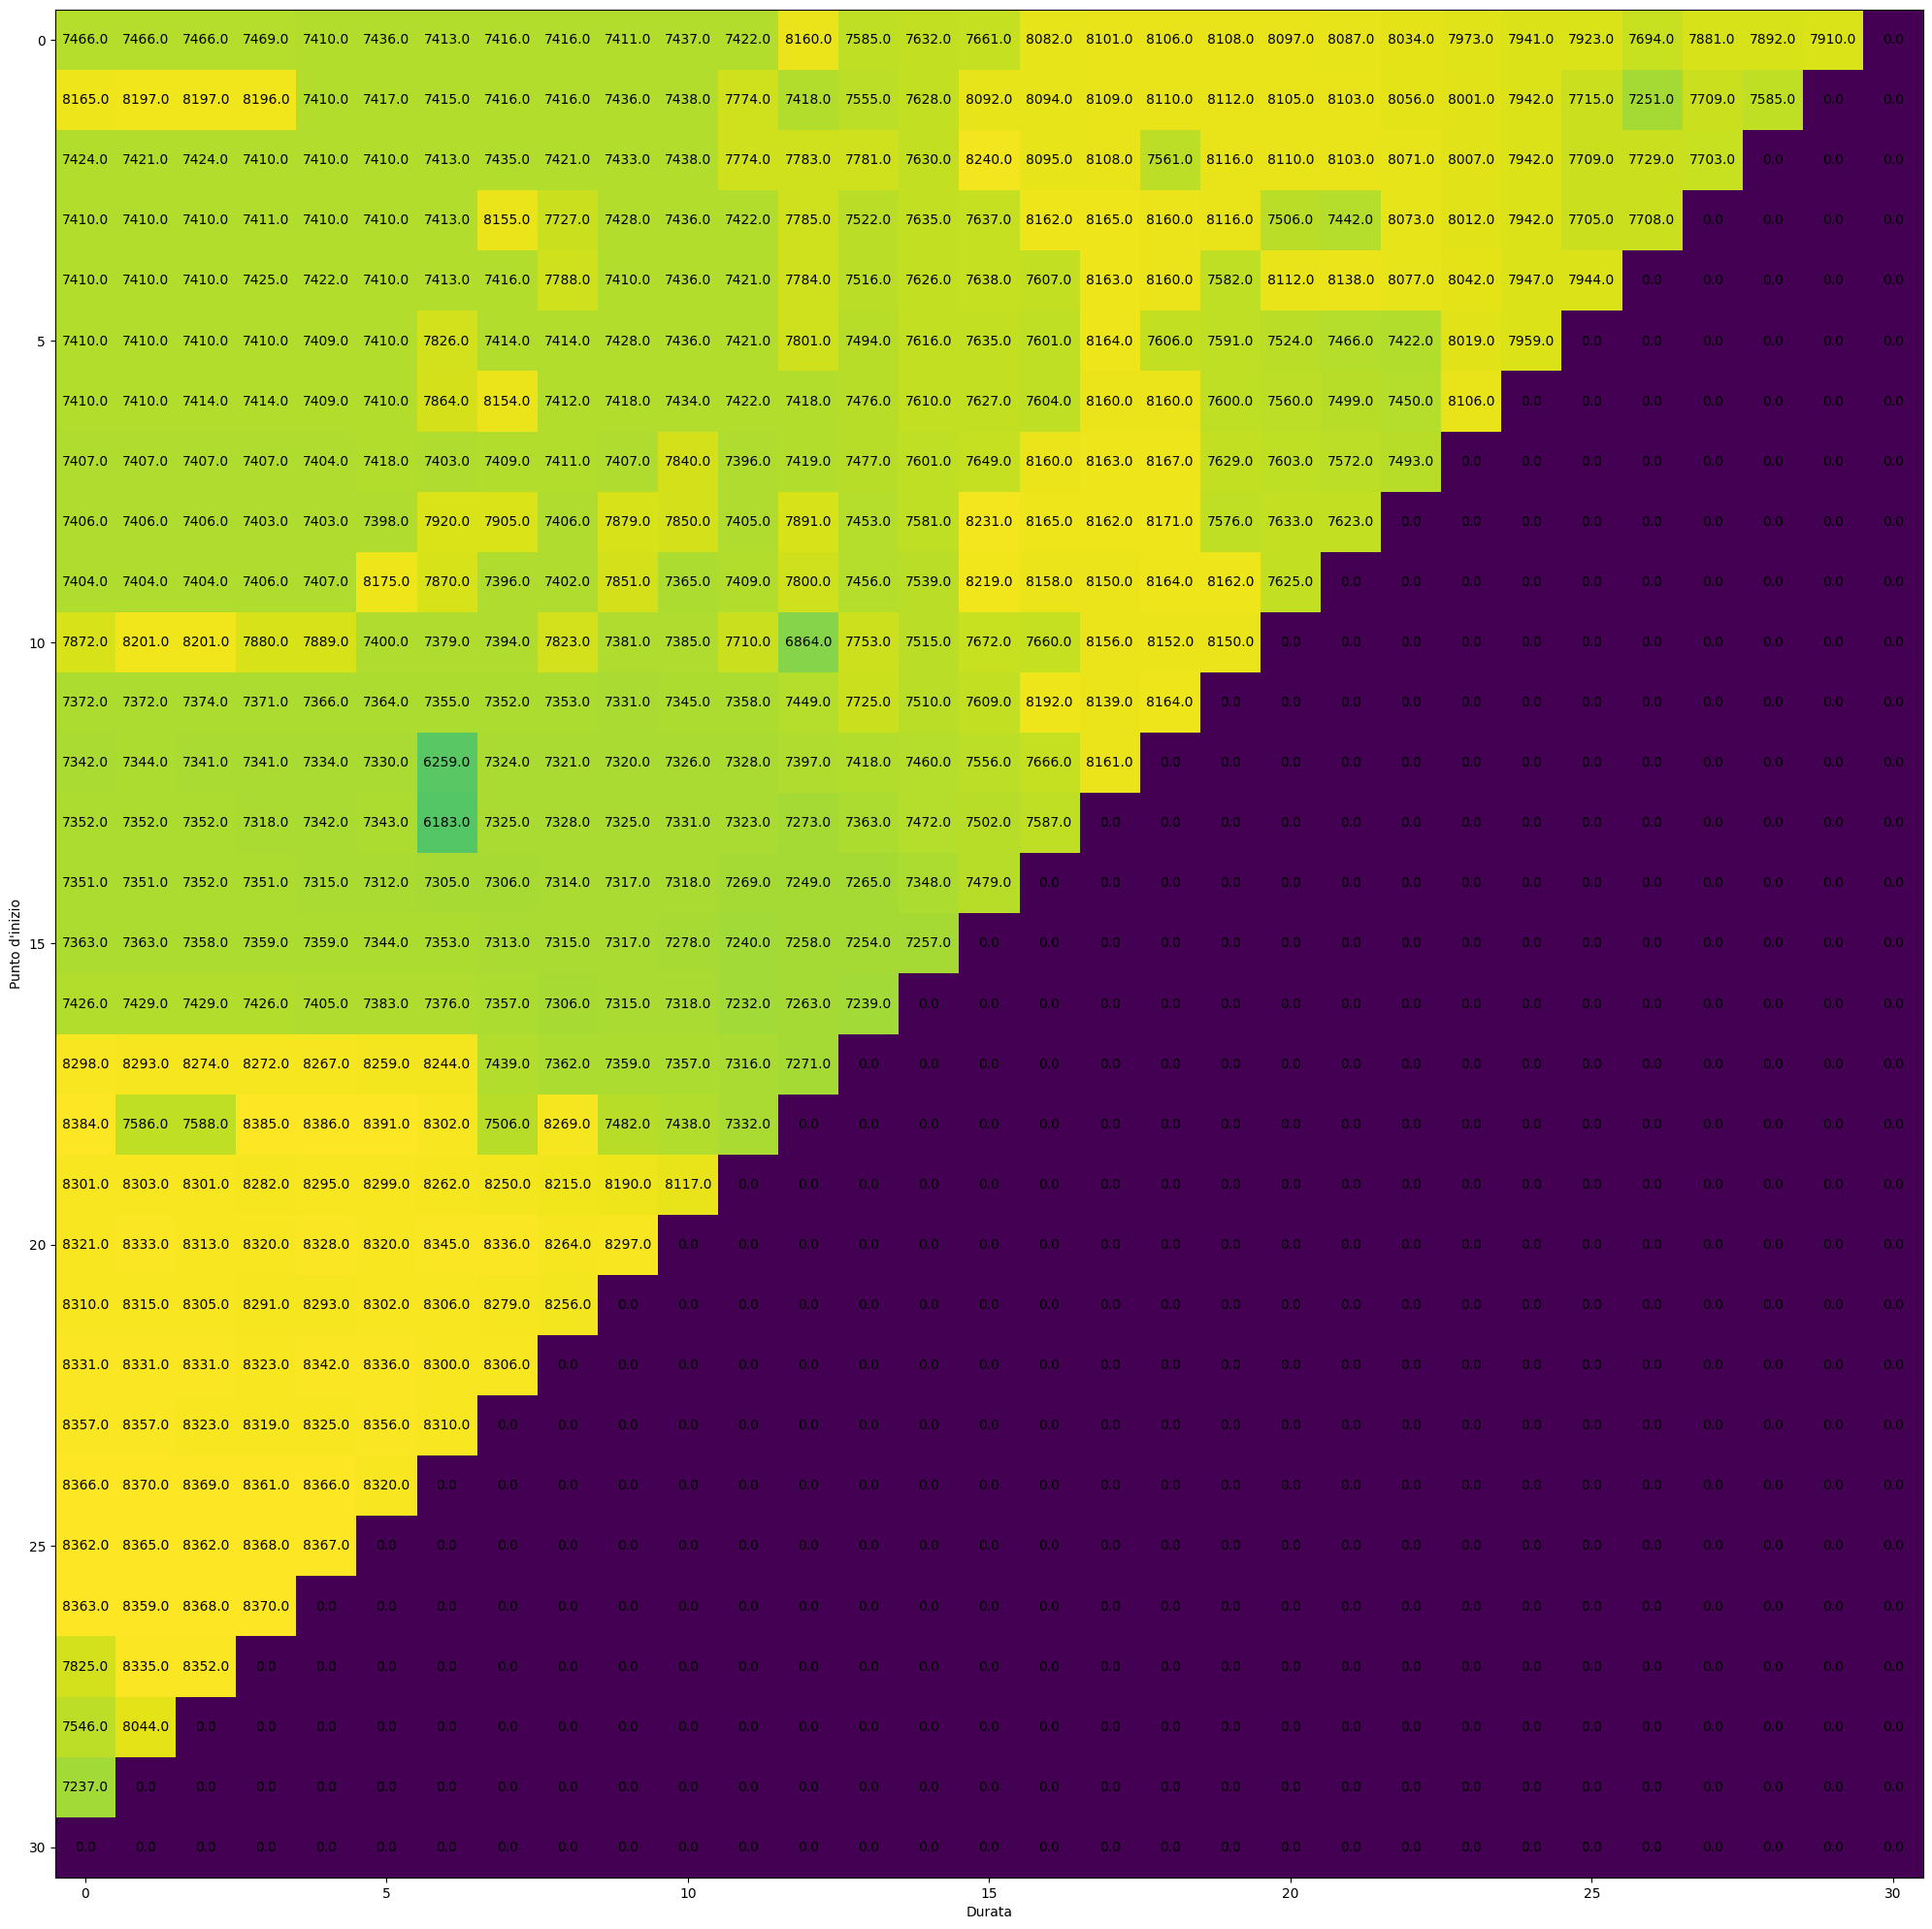

In [156]:
# Abbiamo una matrice triangolare incompleta, dobbiamo riempirla.

current_cluster = 0

m_mean = np.zeros([int(155/5),int(155/5),3])

for cluster,y in zip(cluster_mean,range(0,int(155/5))):
    
    for a,x in zip(cluster,range(0,len(cluster))):
        for c,z in zip(a,range(0,num_cluster)):
            m_mean[x,y,z] = c

import matplotlib as mpl

fig, ax = plt.subplots()

image = ax.imshow(m_mean[:,:,current_cluster])


plt.xlabel("Durata")
plt.ylabel("Punto d'inizio")

fig.set_size_inches(25,25)
for i in range(0,m_mean.shape[0]):
    for j in range(0,m_mean.shape[1]):
        c = np.round(m_mean[i,j,current_cluster],decimals=0)
        ax.text(j, i, str(c), va='center', ha='center')

# Rappresentazione della deviazione standard e della media in uno scatter plot

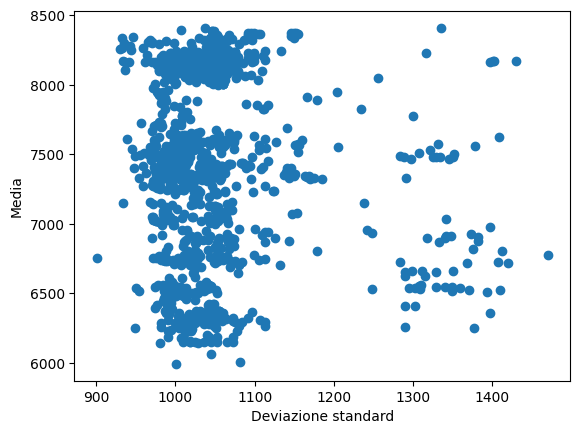

In [157]:
x = m_deviation[m_deviation > 0].flatten()

y = m_mean[m_mean > 0].flatten()

plt.xlabel("Deviazione standard")
plt.ylabel("Media")

plt.scatter(x, y)
plt.show()

In [160]:
# Altra metrica di separazione 

sum_separation = []
num_cluster = 3

for a,s in zip(kmeans_total,newSeries_total):
    
    for y_pred,new_series in zip(a,s):
        rese_c1 = newResa3[y_pred == 0]
        rese_c2 = newResa3[y_pred == 1]
        rese_c3 = newResa3[y_pred == 2]

        rese = [rese_c1,rese_c2,rese_c3]

        for a,i in zip(rese,range(0,3)):
            sum = 0
            for b,j in zip(rese,range(0,3)):
                if(i == j):
                    continue
                for c in a:
                    for d in b:
                        sum += abs(c-d)
            sum_separation[i].append(sum/(len(newResa3)-len(a)))
            
# pezzo new

coesion = []

        for mean,resa,cluster in zip(meanValue,rese,cluster_deviation):   
            sum = 0
            cluster[-1].append([])
            for c in resa:
                sum += (c-mean)**2
            
            coesion.append(np.sqrt(sum/(len(resa)-1)))
            cluster[-1][-1].append(np.sqrt(sum/(len(resa)-1)))
        result[-1].append(np.array(coesion).mean())
            


In [169]:
# Abbiamo una matrice triangolare incompleta, dobbiamo riempirla.

print(len(sum_separation[2]))


current_cluster = 0

m_sum_sep = np.zeros([int(155/5),int(155/5),3])

for cluster,y in zip(sum_separation,range(0,int(155/5))):
    
    for a,x in zip(cluster,range(0,len(cluster))):
        m_sum_sep[x,y] = a

import matplotlib as mpl

fig, ax = plt.subplots()

image = ax.imshow(m_sum_sep[:,:,current_cluster])


plt.xlabel("Durata")
plt.ylabel("Punto d'inizio")

fig.set_size_inches(25,25)
for i in range(0,m_sum_sep.shape[0]):
    for j in range(0,m_sum_sep.shape[1]):
        c = np.round(m_sum_sep[i,j,current_cluster],decimals=0)
        ax.text(j, i, str(c), va='center', ha='center')

465


'current_cluster = 0\n\nm_sum_sep = np.zeros([int(155/5),int(155/5),3])\n\nfor cluster,y in zip(sum_separation,range(0,int(155/5))):\n    \n    for a,x in zip(cluster,range(0,len(cluster))):\n        m_sum_sep[x,y] = a\n\nimport matplotlib as mpl\n\nfig, ax = plt.subplots()\n\nimage = ax.imshow(m_sum_sep[:,:,current_cluster])\n\n\nplt.xlabel("Durata")\nplt.ylabel("Punto d\'inizio")\n\nfig.set_size_inches(25,25)\nfor i in range(0,m_sum_sep.shape[0]):\n    for j in range(0,m_sum_sep.shape[1]):\n        c = np.round(m_sum_sep[i,j,current_cluster],decimals=0)\n        ax.text(j, i, str(c), va=\'center\', ha=\'center\')'